In [ ]:
# Name: Manisha Lakkarsu
# id: 700746573

In [2]:
import pandas as pd #Basic packages for creating dataframes and loading dataset
import numpy as np

import matplotlib.pyplot as plt #Package for visualization

import re #importing package for Regular expression operations

from sklearn.model_selection import train_test_split #Package for splitting the data

from sklearn.preprocessing import LabelEncoder #Package for conversion of categorical to Numerical

from keras.preprocessing.text import Tokenizer #Tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences #Add zeros or crop based on the length
from keras.models import Sequential #Sequential Neural Network
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D #For layers in Neural Network
from tensorflow.keras.utils import to_categorical



In [3]:
# Load the dataset as a Pandas DataFrame
dataset = pd.read_csv('Sentiment.csv')

# Select only the necessary columns 'text' and 'sentiment'
mask = dataset.columns.isin(['text', 'sentiment'])
data = dataset.loc[:, mask]

# Preprocess the text data
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))
data['text'] = data['text'].apply(lambda x: x.replace('rt', ' '))  # Remove 'rt' (Retweets)


C:\Users\manis\AppData\Local\Temp\ipykernel_11296\3905233759.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: x.lower())
C:\Users\manis\AppData\Local\Temp\ipykernel_11296\3905233759.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))
C:\Users\manis\AppData\Local\Temp\ipykernel_11296\3905233759.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [4]:
# Define the function to create the LSTM model
def createmodel():
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Tokenization
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

# Label Encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data['sentiment'])
y = to_categorical(integer_encoded)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# LSTM Model Architecture
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 128)           256000    
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 3)                 591       
                                                                 
Total params: 511391 (1.95 MB)
Trainable params: 511391 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
291/291 - 18s - loss: 0.8252 - accuracy: 0.6436 - val_loss: 0.7496 - val_accuracy: 0.6747 - 18s/epoch - 62ms/step
Epoch 2/10
291/291 - 17s - loss: 0.6791 - accuracy: 0.7114 - val_loss: 0.7438 - val_accuracy: 0.6863 - 17s/epoch - 59ms/step
Epoch 3/10
291/291 - 17s - lo

144/144 - 1s - loss: 1.2282 - accuracy: 0.6566 - 1s/epoch - 8ms/step
Test Loss: 1.2282441854476929
Test Accuracy: 0.656618595123291


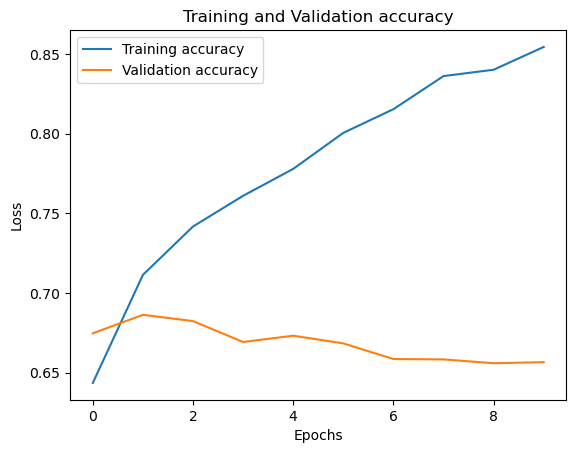

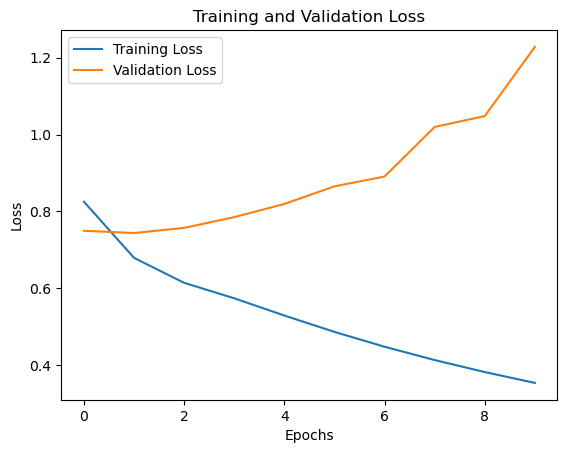

In [7]:
# Evaluate the model on test data
score, accuracy = model.evaluate(X_test, y_test, verbose=2, batch_size=32)
print("Test Loss:", score)
print("Test Accuracy:", accuracy)


# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation accuracy')
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [8]:
# Save the trained model
model.save('sentimentAnalysis.keras')

In [9]:
from keras.models import load_model
model = load_model('sentimentAnalysis.keras')

In [10]:
# Define the text data to predict sentiment
sentence = ['A lot of good things are happening. We are respected again throughout the world, and that is a great thing. @realDonaldTrump']

# Tokenize and pad the sentence
sentence = tokenizer.texts_to_sequences(sentence)
sentence = pad_sequences(sentence, maxlen=28, dtype='int32', value=0)

In [11]:
# Make predictions using the loaded model
sentiment_probs = model.predict(sentence, batch_size=1, verbose=2)[0]

# Convert sentiment probabilities to sentiment label
sentiment = np.argmax(sentiment_probs)

# Print the sentiment label
if sentiment == 0:
    print("Neutral")
elif sentiment < 0:
    print("Negative")
elif sentiment > 0:
    print("Positive")
else:
    print("Cannot be determined")

1/1 - 0s - 222ms/epoch - 222ms/step
Neutral


In [12]:
# Apply GridSearchCV on the source code provided in the class
from scikeras.wrappers import KerasClassifier #importing Keras classifier
from sklearn.model_selection import GridSearchCV #importing Grid search CV

In [13]:
# Now you can proceed with the GridSearchCV
model = KerasClassifier(build_fn=createmodel, verbose=2)
batch_size = [10, 20, 40]
epochs = [1, 2]
param_grid = {'batch_size': batch_size, 'epochs': epochs}
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)


# Print the best score and best hyperparameters found by GridSearchCV
print("Best Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


744/744 - 30s - loss: 0.8219 - accuracy: 0.6538 - 30s/epoch - 41ms/step
186/186 - 1s - 1s/epoch - 7ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


744/744 - 35s - loss: 0.8195 - accuracy: 0.6462 - 35s/epoch - 47ms/step
186/186 - 2s - 2s/epoch - 9ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


744/744 - 32s - loss: 0.8239 - accuracy: 0.6451 - 32s/epoch - 44ms/step
186/186 - 1s - 1s/epoch - 8ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


744/744 - 34s - loss: 0.8259 - accuracy: 0.6510 - 34s/epoch - 46ms/step
186/186 - 2s - 2s/epoch - 8ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


744/744 - 37s - loss: 0.8284 - accuracy: 0.6472 - 37s/epoch - 50ms/step
186/186 - 2s - 2s/epoch - 12ms/step
Epoch 1/2


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


744/744 - 34s - loss: 0.8305 - accuracy: 0.6441 - 34s/epoch - 46ms/step
Epoch 2/2
744/744 - 32s - loss: 0.6862 - accuracy: 0.7103 - 32s/epoch - 43ms/step
186/186 - 2s - 2s/epoch - 10ms/step
Epoch 1/2


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


744/744 - 33s - loss: 0.8226 - accuracy: 0.6480 - 33s/epoch - 45ms/step
Epoch 2/2
744/744 - 32s - loss: 0.6834 - accuracy: 0.7166 - 32s/epoch - 43ms/step
186/186 - 2s - 2s/epoch - 8ms/step
Epoch 1/2


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


744/744 - 39s - loss: 0.8174 - accuracy: 0.6469 - 39s/epoch - 53ms/step
Epoch 2/2
744/744 - 39s - loss: 0.6713 - accuracy: 0.7168 - 39s/epoch - 52ms/step
186/186 - 3s - 3s/epoch - 16ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
744/744 - 40s - loss: 0.8244 - accuracy: 0.6460 - 40s/epoch - 54ms/step
Epoch 2/2
744/744 - 37s - loss: 0.6759 - accuracy: 0.7115 - 37s/epoch - 49ms/step
186/186 - 2s - 2s/epoch - 13ms/step
Epoch 1/2


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


744/744 - 36s - loss: 0.8177 - accuracy: 0.6504 - 36s/epoch - 49ms/step
Epoch 2/2
744/744 - 34s - loss: 0.6704 - accuracy: 0.7176 - 34s/epoch - 46ms/step
186/186 - 2s - 2s/epoch - 11ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


372/372 - 28s - loss: 0.8263 - accuracy: 0.6441 - 28s/epoch - 75ms/step
93/93 - 2s - 2s/epoch - 23ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


372/372 - 29s - loss: 0.8333 - accuracy: 0.6478 - 29s/epoch - 78ms/step
93/93 - 2s - 2s/epoch - 23ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


372/372 - 38s - loss: 0.8334 - accuracy: 0.6376 - 38s/epoch - 102ms/step
93/93 - 3s - 3s/epoch - 35ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


372/372 - 31s - loss: 0.8358 - accuracy: 0.6417 - 31s/epoch - 84ms/step
93/93 - 3s - 3s/epoch - 28ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


372/372 - 30s - loss: 0.8290 - accuracy: 0.6428 - 30s/epoch - 82ms/step
93/93 - 2s - 2s/epoch - 23ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
372/372 - 39s - loss: 0.8346 - accuracy: 0.6434 - 39s/epoch - 105ms/step
Epoch 2/2
372/372 - 36s - loss: 0.6790 - accuracy: 0.7104 - 36s/epoch - 98ms/step
93/93 - 3s - 3s/epoch - 30ms/step
Epoch 1/2


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


372/372 - 34s - loss: 0.8285 - accuracy: 0.6427 - 34s/epoch - 93ms/step
Epoch 2/2
372/372 - 32s - loss: 0.6827 - accuracy: 0.7078 - 32s/epoch - 86ms/step
93/93 - 3s - 3s/epoch - 28ms/step
Epoch 1/2


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


372/372 - 34s - loss: 0.8340 - accuracy: 0.6429 - 34s/epoch - 91ms/step
Epoch 2/2
372/372 - 31s - loss: 0.6780 - accuracy: 0.7116 - 31s/epoch - 84ms/step
93/93 - 2s - 2s/epoch - 25ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
372/372 - 48s - loss: 0.8357 - accuracy: 0.6409 - 48s/epoch - 128ms/step
Epoch 2/2
372/372 - 49s - loss: 0.6851 - accuracy: 0.7098 - 49s/epoch - 133ms/step
93/93 - 4s - 4s/epoch - 47ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
372/372 - 48s - loss: 0.8322 - accuracy: 0.6452 - 48s/epoch - 128ms/step
Epoch 2/2
372/372 - 43s - loss: 0.6704 - accuracy: 0.7137 - 43s/epoch - 117ms/step
93/93 - 4s - 4s/epoch - 41ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


186/186 - 44s - loss: 0.8547 - accuracy: 0.6355 - 44s/epoch - 237ms/step
47/47 - 4s - 4s/epoch - 86ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


186/186 - 40s - loss: 0.8369 - accuracy: 0.6447 - 40s/epoch - 217ms/step
47/47 - 4s - 4s/epoch - 89ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


186/186 - 33s - loss: 0.8423 - accuracy: 0.6345 - 33s/epoch - 179ms/step
47/47 - 3s - 3s/epoch - 71ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


186/186 - 42s - loss: 0.8421 - accuracy: 0.6331 - 42s/epoch - 227ms/step
47/47 - 4s - 4s/epoch - 92ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


186/186 - 35s - loss: 0.8498 - accuracy: 0.6375 - 35s/epoch - 188ms/step
47/47 - 3s - 3s/epoch - 73ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
186/186 - 32s - loss: 0.8529 - accuracy: 0.6345 - 32s/epoch - 171ms/step
Epoch 2/2
186/186 - 29s - loss: 0.6926 - accuracy: 0.7073 - 29s/epoch - 156ms/step
47/47 - 4s - 4s/epoch - 82ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
186/186 - 44s - loss: 0.8553 - accuracy: 0.6316 - 44s/epoch - 236ms/step
Epoch 2/2
186/186 - 39s - loss: 0.6915 - accuracy: 0.7047 - 39s/epoch - 212ms/step
47/47 - 5s - 5s/epoch - 104ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
186/186 - 39s - loss: 0.8456 - accuracy: 0.6326 - 39s/epoch - 209ms/step
Epoch 2/2
186/186 - 33s - loss: 0.6923 - accuracy: 0.7024 - 33s/epoch - 176ms/step
47/47 - 3s - 3s/epoch - 73ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
186/186 - 35s - loss: 0.8447 - accuracy: 0.6369 - 35s/epoch - 190ms/step
Epoch 2/2
186/186 - 30s - loss: 0.6886 - accuracy: 0.7064 - 30s/epoch - 161ms/step
47/47 - 4s - 4s/epoch - 82ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
186/186 - 45s - loss: 0.8373 - accuracy: 0.6399 - 45s/epoch - 244ms/step
Epoch 2/2
186/186 - 37s - loss: 0.6831 - accuracy: 0.7080 - 37s/epoch - 201ms/step
47/47 - 5s - 5s/epoch - 111ms/step


C:\Users\manis\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
233/233 - 42s - loss: 0.8345 - accuracy: 0.6422 - 42s/epoch - 182ms/step
Epoch 2/2
233/233 - 37s - loss: 0.6830 - accuracy: 0.7086 - 37s/epoch - 157ms/step
Best Score: 0.683848 using {'batch_size': 40, 'epochs': 2}


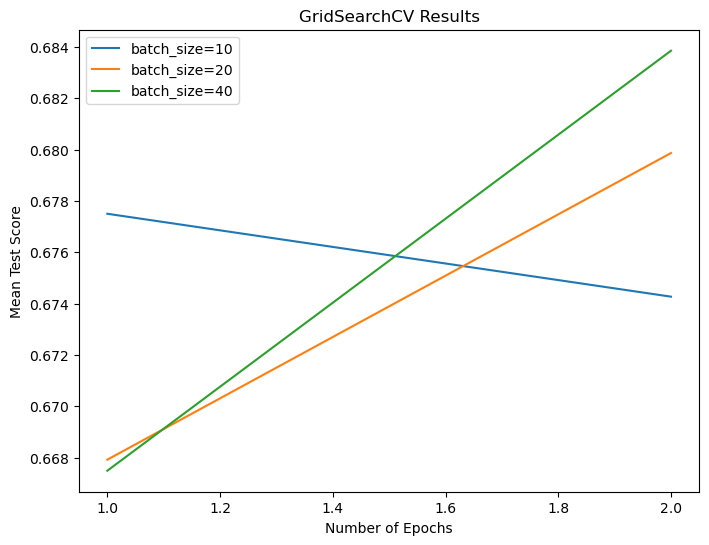

In [14]:
# Plot the results of GridSearchCV
mean_scores = grid_result.cv_results_['mean_test_score']
param_batch_size = grid_result.cv_results_['param_batch_size']
param_epochs = grid_result.cv_results_['param_epochs']

plt.figure(figsize=(8, 6))
for i, batch_size in enumerate(batch_size):
    plt.plot(epochs, mean_scores[i * len(epochs): (i + 1) * len(epochs)], label=f'batch_size={batch_size}')

plt.xlabel('Number of Epochs')
plt.ylabel('Mean Test Score')
plt.title('GridSearchCV Results')
plt.legend()
plt.show()